In [67]:
import pickle
import random_graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['figure.figsize']


%matplotlib inline

In [3]:
with open('experiment_store.pickle', 'rb') as f:
    EXPERIMENT_STORE = pickle.load(f)
with open('experiment_store_1.pickle', 'rb') as f:
    EXPERIMENT_STORE1 = pickle.load(f)
with open('experiment_store_2.pickle', 'rb') as f:
    EXPERIMENT_STORE2 = pickle.load(f)
with open('experiment_store_3.pickle', 'rb') as f:
    EXPERIMENT_STORE3 = pickle.load(f)
with open('experiment_store_4.pickle', 'rb') as f:
    EXPERIMENT_STORE4 = pickle.load(f)
EXPERIMENT_STORES = [EXPERIMENT_STORE, EXPERIMENT_STORE1, EXPERIMENT_STORE2, EXPERIMENT_STORE3, EXPERIMENT_STORE4]

In [4]:
EXPERIMENT_STORE = sum(EXPERIMENT_STORES, [])
len(EXPERIMENT_STORE)

99

In [5]:
sorted_experiments = sorted(EXPERIMENT_STORE, key=lambda x: x['acc_mean'], reverse=True)

In [6]:
top_5_experiments = sorted_experiments[0:5]

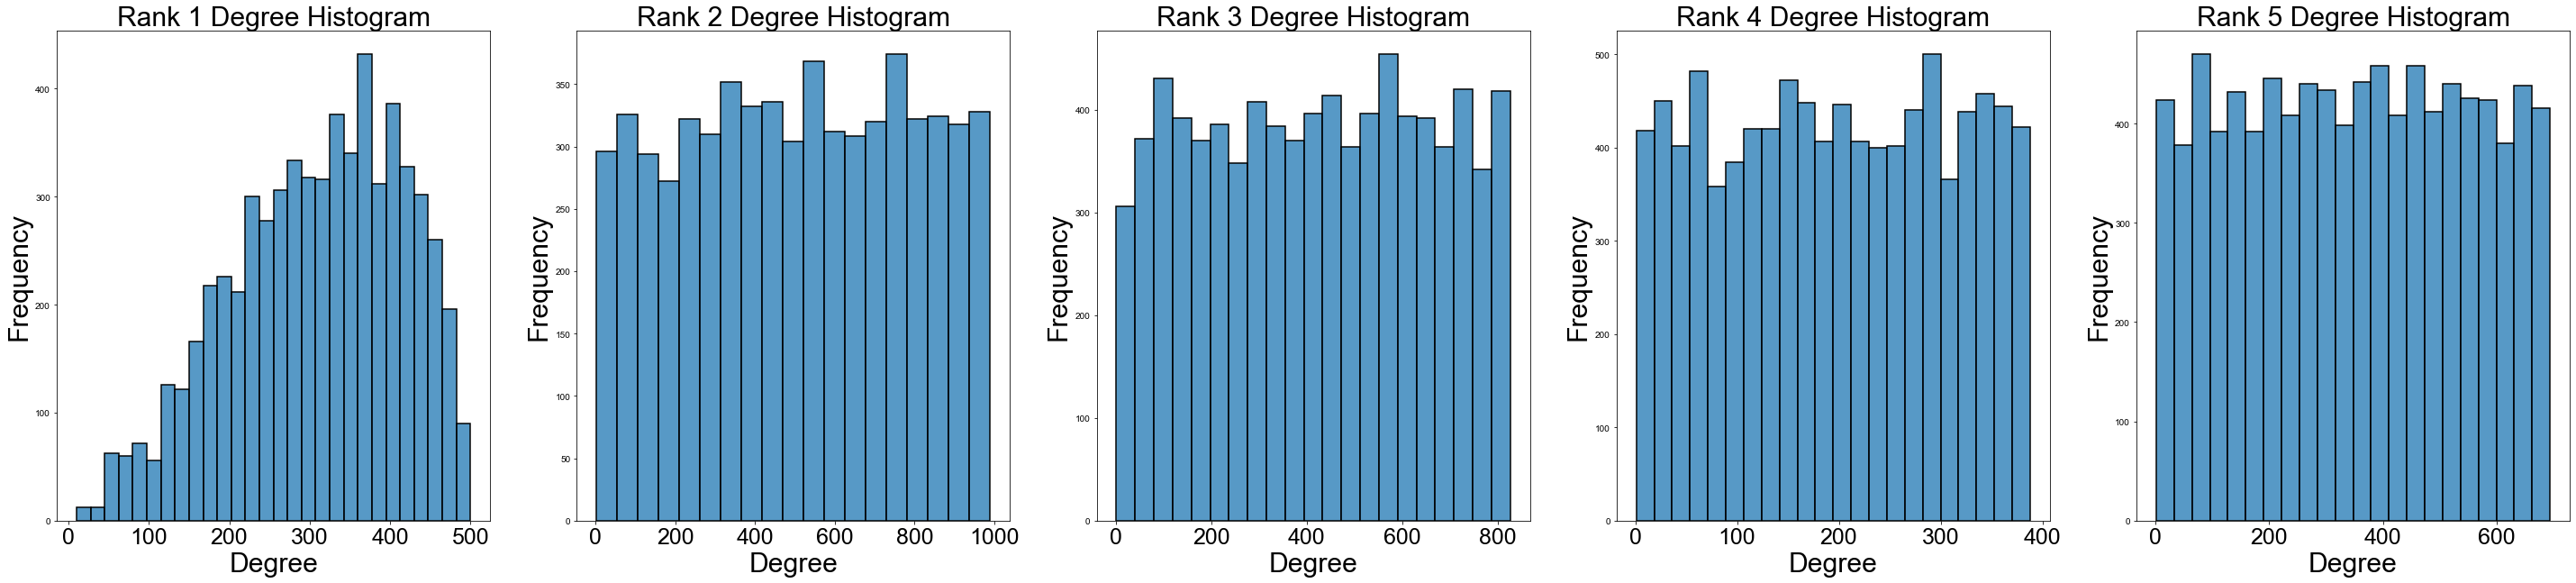

In [7]:
ncols = len(top_5_experiments)
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(50, 10))
with sns.plotting_context("talk", font_scale=2):
    for index, experiment in enumerate(top_5_experiments):
        if 'degree_sequence_W' in experiment['parameters'].keys():
            degree_sequence=experiment['parameters']['degree_sequence_W']
            indegree, outdegree = zip(*degree_sequence)
            sns.histplot(indegree + outdegree, ax=axes[index], label='big')
            axes[index].set_xlabel("Degree", fontsize = 30)
            axes[index].set_ylabel("Frequency", fontsize = 30)
            axes[index].set_title(f"Rank {index+1} Degree Histogram", fontsize = 30)
            axes[index].tick_params(axis='x', labelsize=25 )


In [8]:
labels = np.tile(np.arange(0, 10), (1000, 1)).flatten('F')

In [9]:
labels

array([0, 0, 0, ..., 9, 9, 9])

[[870   0  52   3   4  11  29  15   6  10]
 [  0 718   1  11   5  37   0   2 218   8]
 [ 13 168 532  35 184  14  21  13  18   2]
 [ 19  52  19 765  20  26   5  12  31  51]
 [  0  29   2  28 736   3  57  19   6 120]
 [ 34  15   2 376  21 433  61  14   2  42]
 [  9  90  12   2  29  21 835   2   0   0]
 [  5  27  23  20  15   1   0 739  27 143]
 [  8  73  72 192  38  34  32  19 423 109]
 [  9   6  14 108 178   6   5 173   9 492]]
[[845   1  29   6   1   8  85  18   4   3]
 [  0 908   0   1   0   0   1   3  74  13]
 [ 20 188 366  30 181   3  63  29 119   1]
 [ 13  60   7 773   8   3  21  23  61  31]
 [  1  30   3   7 605   1  77  12  14 250]
 [ 23  89   1 344  15 227 126  22  44 109]
 [  7  68  25   1  18   8 871   2   0   0]
 [  6  36   3  17   9   0   1 784  48  96]
 [  9 125  13 132  21   4  45  12 540  99]
 [ 13   7  13  56 135   0  10 163  35 568]]
[[882   0  33   4   2  10  33  14  10  12]
 [  0 650   1  15   5  37   1   2 262  27]
 [ 12 105 593  35 160  20  36  13  22   4]
 [ 20  34

/var/folders/hl/hphwgcmj5klg4y0m96np3mdm0000gn/T/ipykernel_67694/3311927351.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


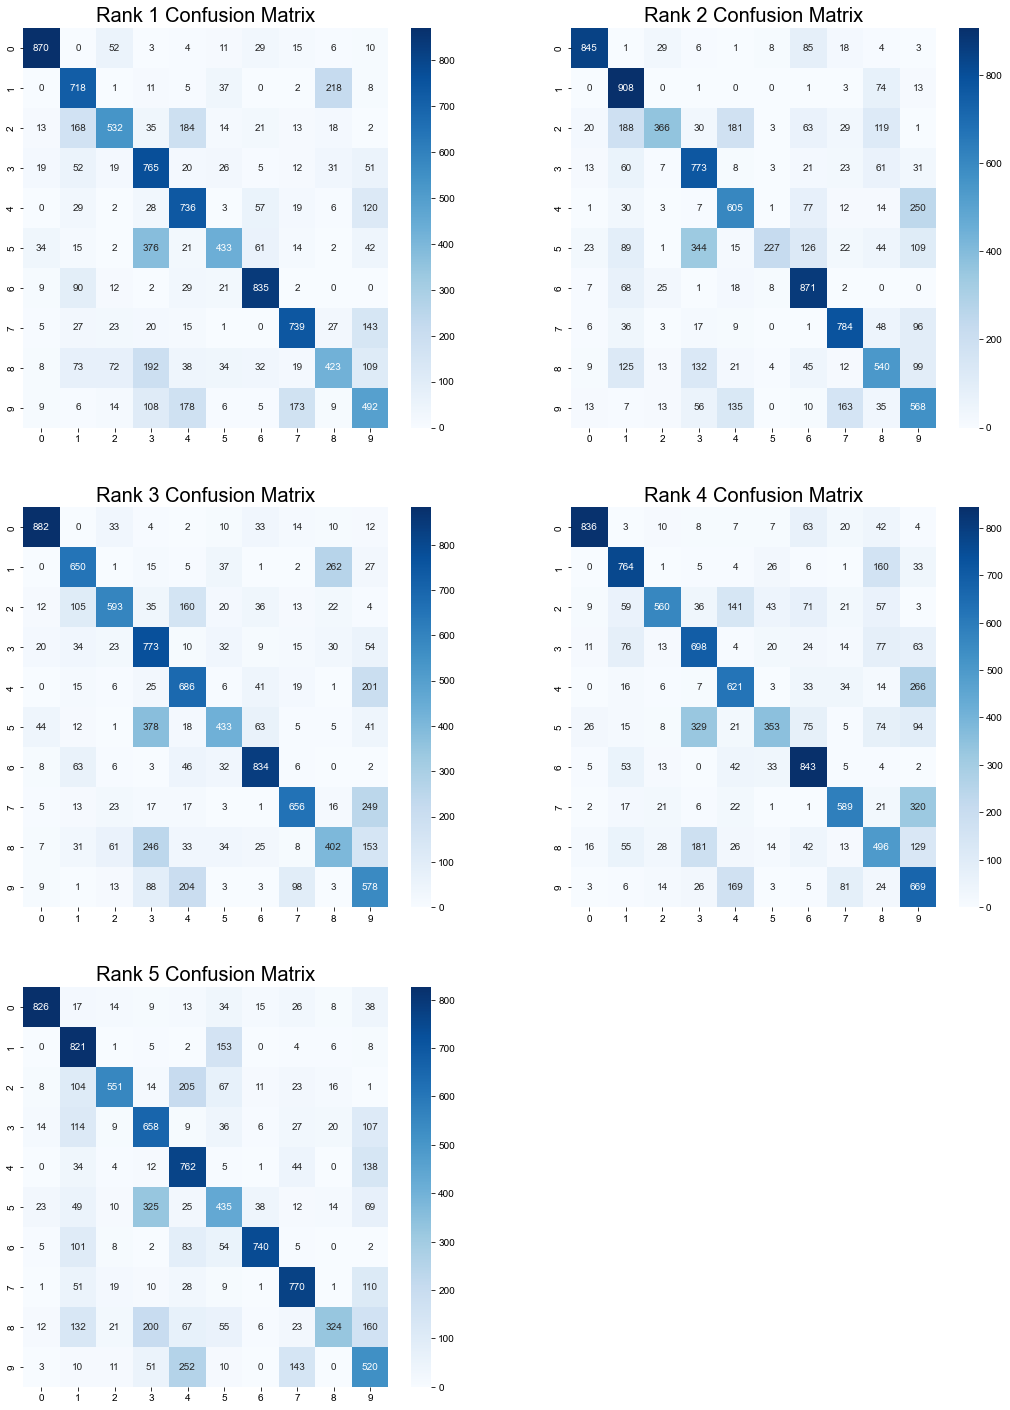

In [10]:
from sklearn.metrics import confusion_matrix
ncols = 2
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 25))
fig.delaxes(axes[2][1])
for index, experiment in enumerate(top_5_experiments):
    # print(experiment.keys())
    if 'labels' in experiment.keys():
        # print(experiment['predictions'])
        cf_matrix = confusion_matrix(labels, experiment['predictions'])
        print(cf_matrix)
        sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt='g', ax=axes[index//ncols, index%ncols])
        ax=axes[index//ncols, index%ncols].set_title(f"Rank {index+1} Confusion Matrix", fontsize = 20)
fig.show()

In [80]:
len(experiment['parameters']['degree_sequence_W'])

4658

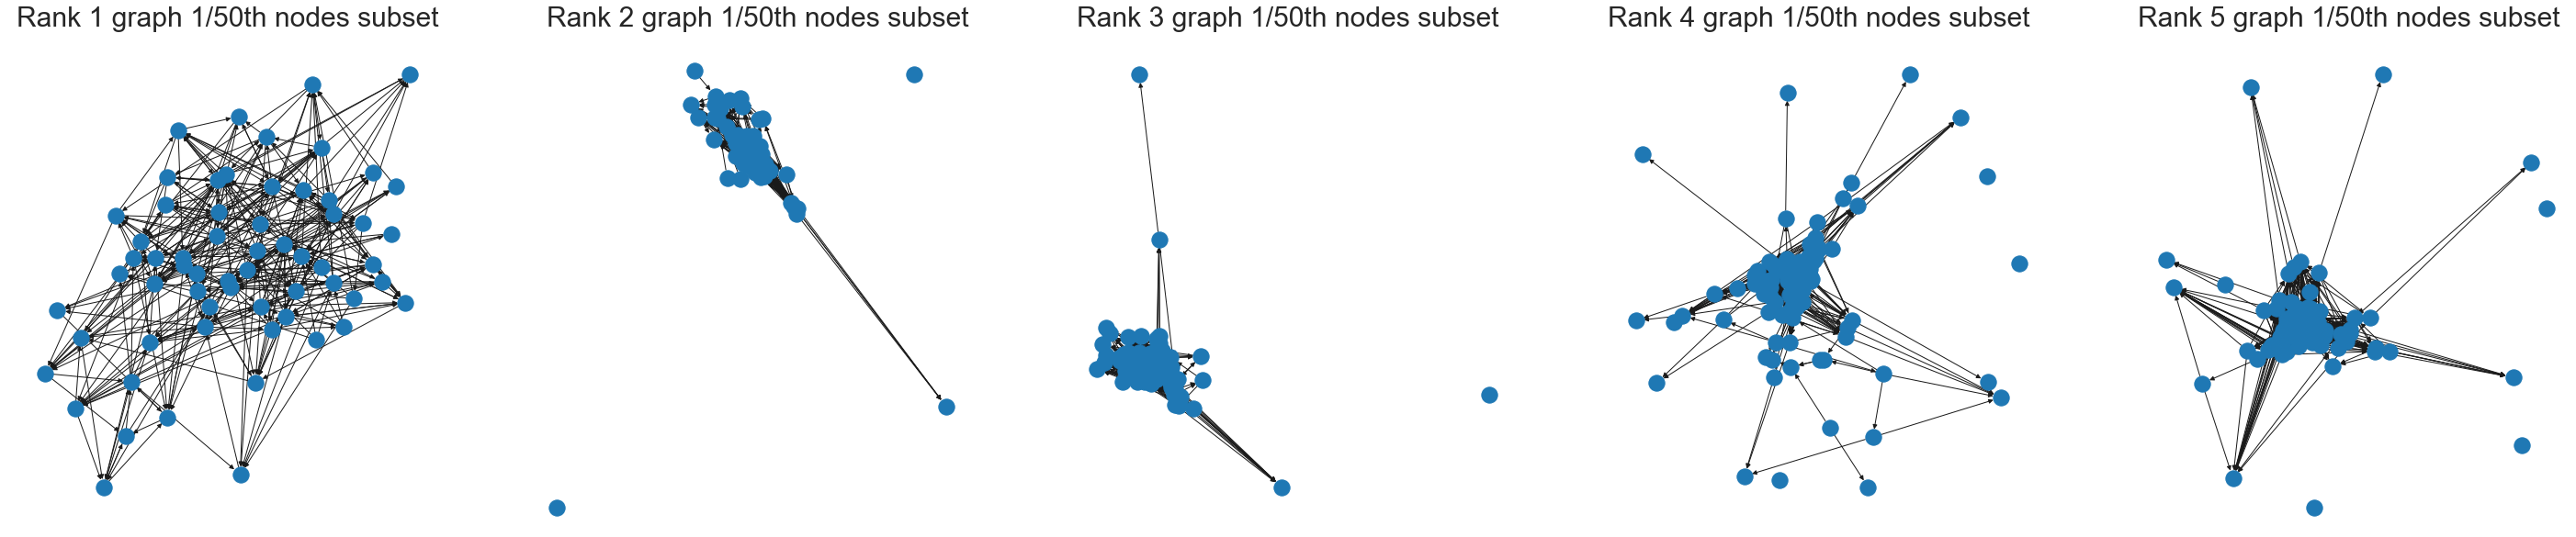

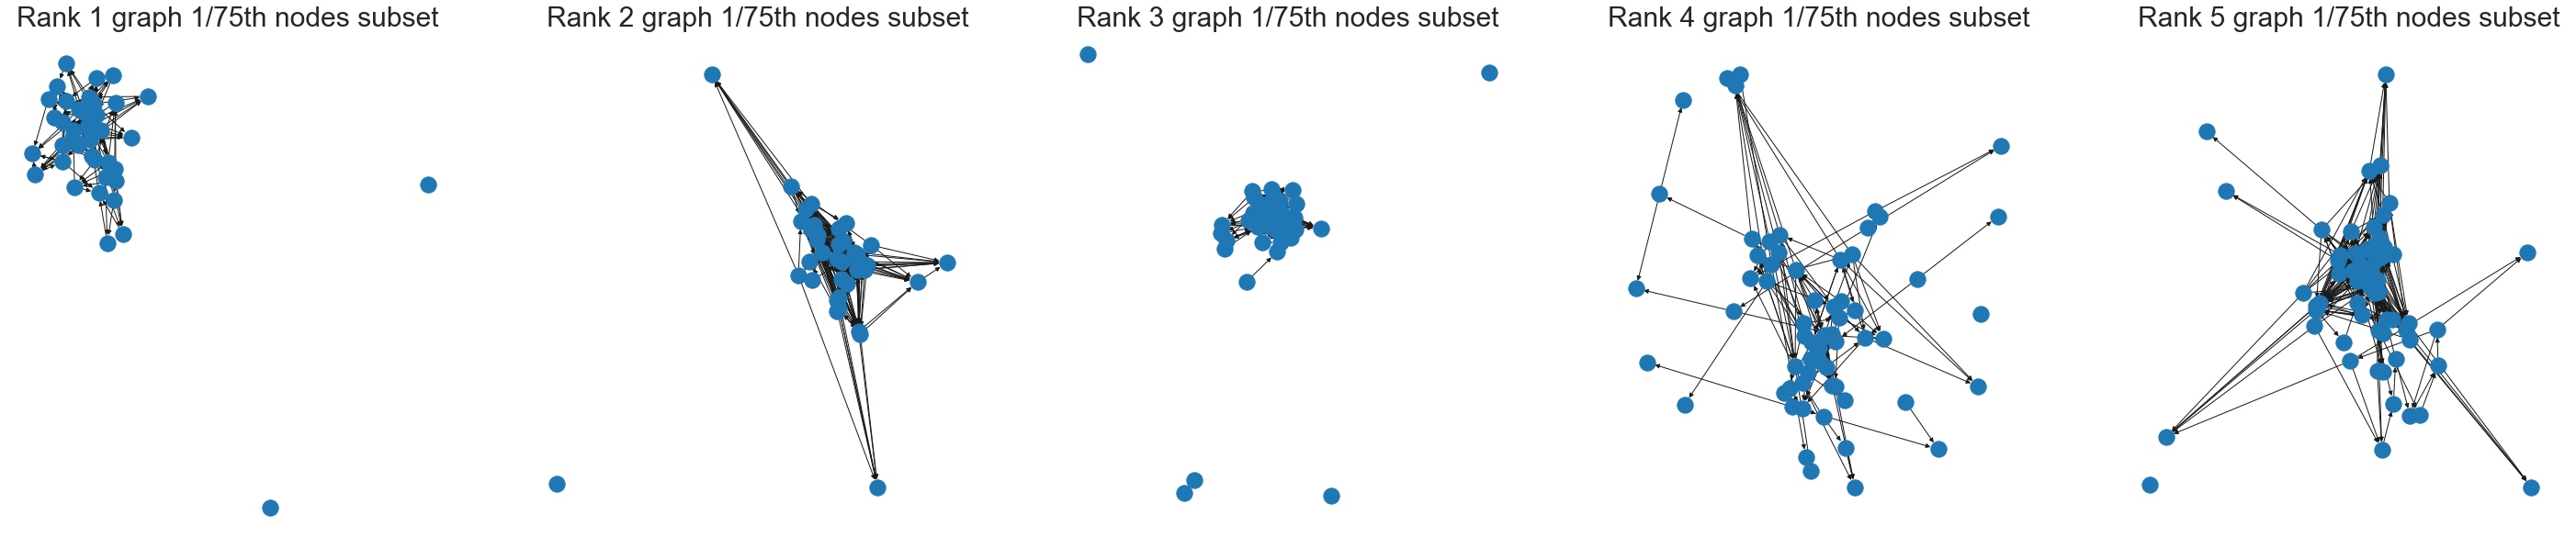

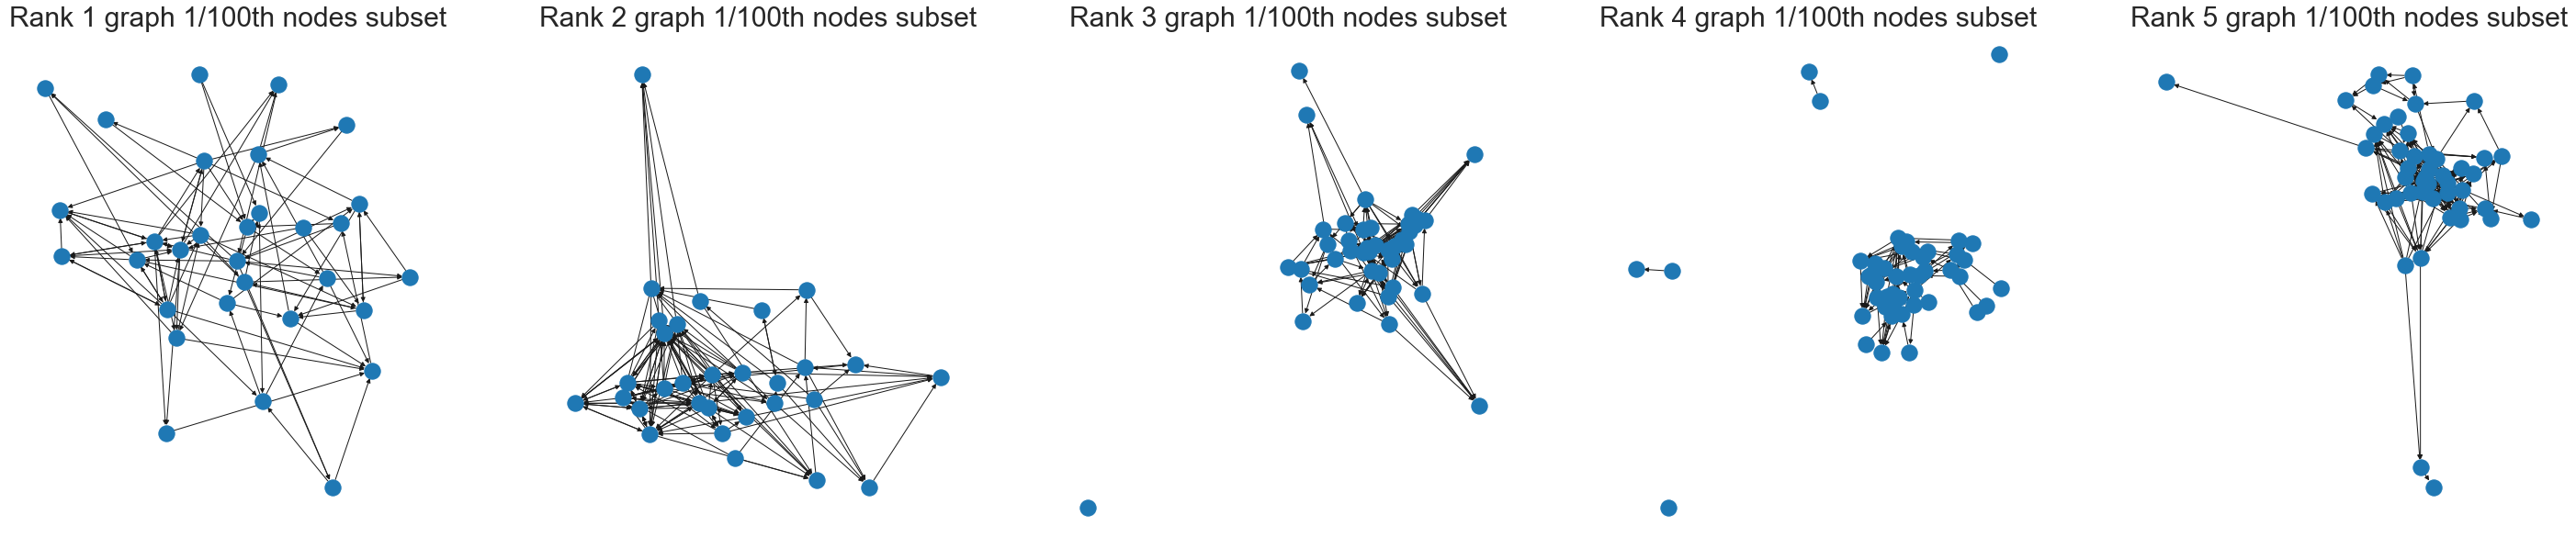

In [82]:
ncols = len(top_5_experiments)

for factor in [50, 75, 100]:
    fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(50, 10))
    for index, experiment in enumerate(top_5_experiments):
        if 'degree_sequence_W' in experiment['parameters'].keys():
            degree_sequence=experiment['parameters']['degree_sequence_W']
            n_iter=experiment['parameters']['n_iter']

            A_edges = random_graph.sample_directed_graph(degree_sequence=degree_sequence, n_iter=n_iter)
            A_graph = nx.DiGraph()
            A_graph.add_nodes_from(range(len(experiment['parameters']['degree_sequence_W'])))
            A_graph.add_edges_from(A_edges)
        
            indices = np.random.choice(len(experiment['parameters']['degree_sequence_W']), size=len(experiment['parameters']['degree_sequence_W'])//factor, replace=False)
            nx.draw(A_graph.subgraph(indices), ax=axes[index])
            axes[index].set_title(f"Rank {index+1} graph 1/{factor}th nodes subset", fontsize = 30)

    fig.savefig(f'random_graph_1_{factor}th_subgraph_2.png')


In [93]:
non_graphical_hyperparameters = []

relevant_keys = [
    'n_iter', 
    'cap_size', 
    'beta_factor', 
    'a_sparsity', 
    'n_rounds',
    'n_neurons'
]

for experiment in sorted_experiments:
    if 'acc_mean' in experiment.keys() and 'distribution' in experiment['parameters'].keys():
        experiment_subset = {key: value for key, value in experiment['parameters'].items() if key in relevant_keys}
        experiment_subset['accuracy'] = experiment['acc_mean']
        experiment_subset.update(experiment['parameters']['distribution'])
        non_graphical_hyperparameters.append(experiment_subset)

experiment_df = pd.DataFrame(non_graphical_hyperparameters)
transformed_experiment_df = experiment_df.copy()
transformed_experiment_df['accuracy'] = scipy.special.logit(experiment_df['accuracy'])

num_cols = transformed_experiment_df.columns[transformed_experiment_df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
standardized_experiment_df_numeric = StandardScaler().fit_transform(transformed_experiment_df[num_cols])
standardized_experiment_df = transformed_experiment_df.copy()
standardized_experiment_df[num_cols] = standardized_experiment_df_numeric

print(standardized_experiment_df)

    n_neurons    n_iter  cap_size  n_rounds  beta_factor  a_sparsity  \
0   -0.027509 -0.177795 -0.255114 -0.189123     1.540314    0.809612   
1   -0.062943 -0.597700 -0.554680  0.756492    -0.595618    0.644912   
2    0.646454 -0.056304 -0.042519 -0.189123     1.422186   -0.863925   
3    1.093637 -0.669836  0.537286  0.756492     0.242781    0.069477   
4    1.070250  1.956659  0.411662  1.702107     1.173340    0.052185   
5   -0.369806 -0.798921  0.266710  1.702107     0.960358    1.245209   
6   -0.287598 -0.095788  0.295701  0.283685     0.478388    0.051945   
7   -0.426501 -0.853592 -0.564344  1.702107     0.436715    1.192640   
8    0.445186  0.699981  0.788535  1.229300     0.306330    0.711068   
9    1.362938 -0.763233  0.334354  1.229300     1.300613   -0.733689   
10  -0.629186 -0.427612 -0.371075 -0.189123     1.655334   -1.370334   
11  -0.607925 -0.315233 -0.187470  0.756492    -1.128059   -0.940970   
12  -0.100504  0.570137  0.170076  0.283685     0.132846   -0.66

In [23]:
experiment_df.to_csv('experiment_df.csv')

In [44]:
experiment_df.columns = ['# neurons', 'randomness iterations', 'cap size', 'train rounds', 'beta factor', 'activation sparsity', 'accuracy', 'distribution type', 'alpha', 'beta', 'binomial n', 'binomial p']

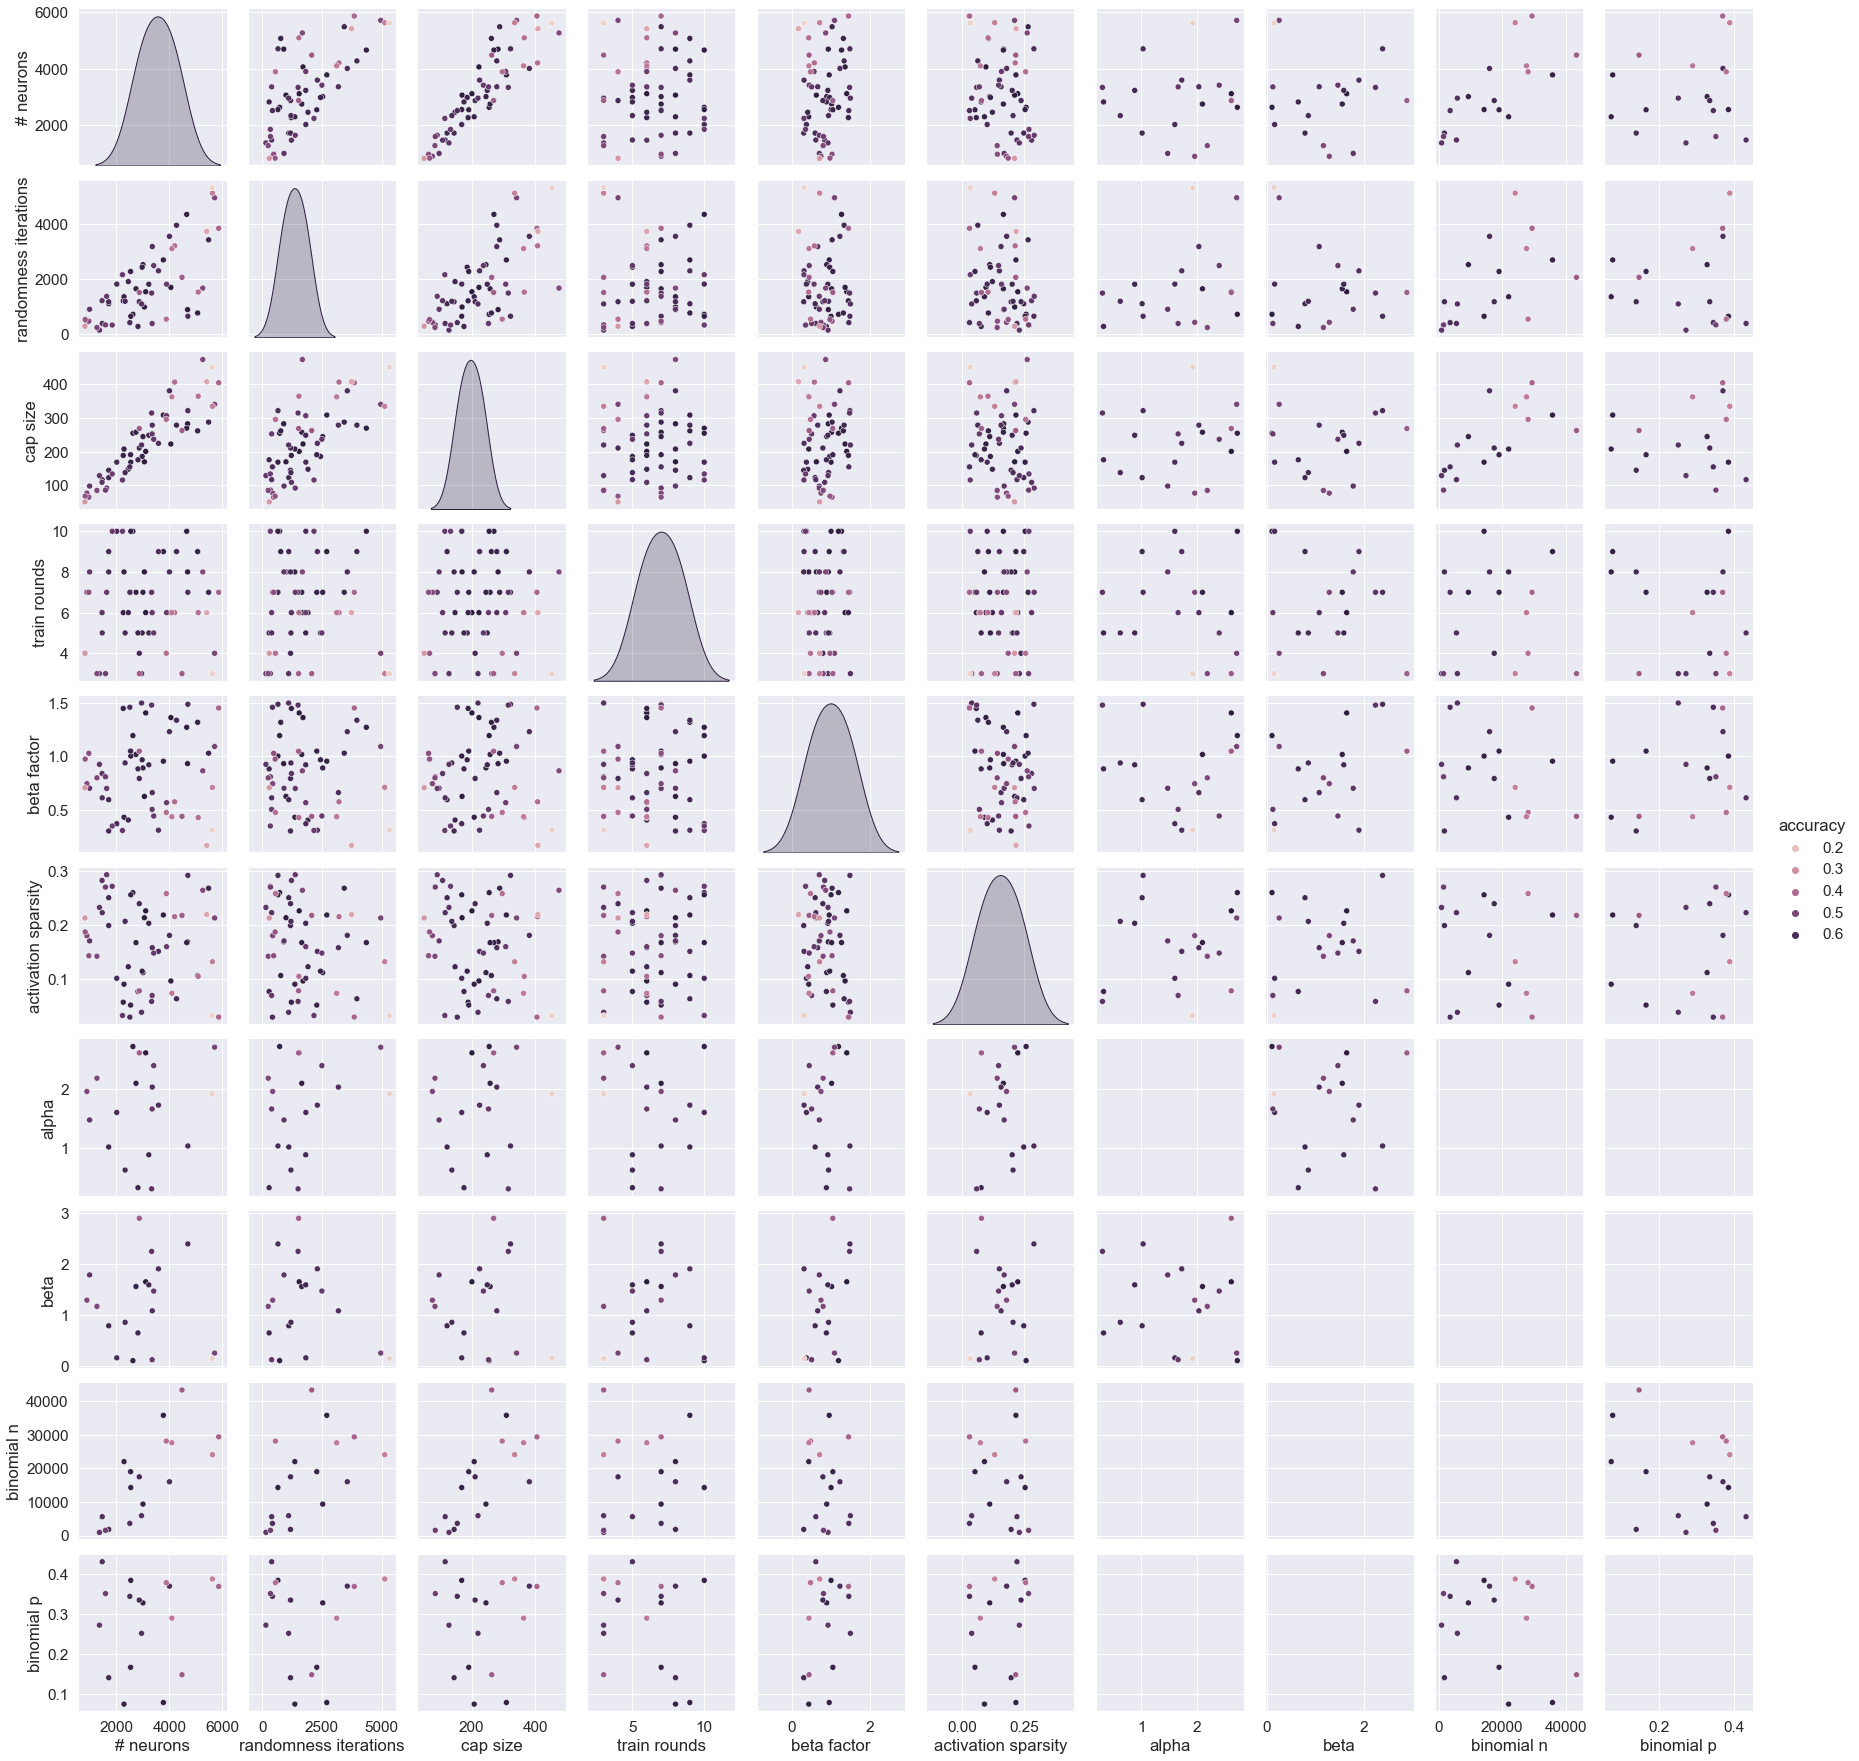

In [29]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(font_scale = 1.4)
sns.pairplot(experiment_df, hue="accuracy", diag_kind="auto")
plt.savefig('random_graph_pairplot_2.png', dpi=600)
# plt.suptitle('Average Accuracy vs. Pairwise Plot of Features', fontsize=30, y=1.03)

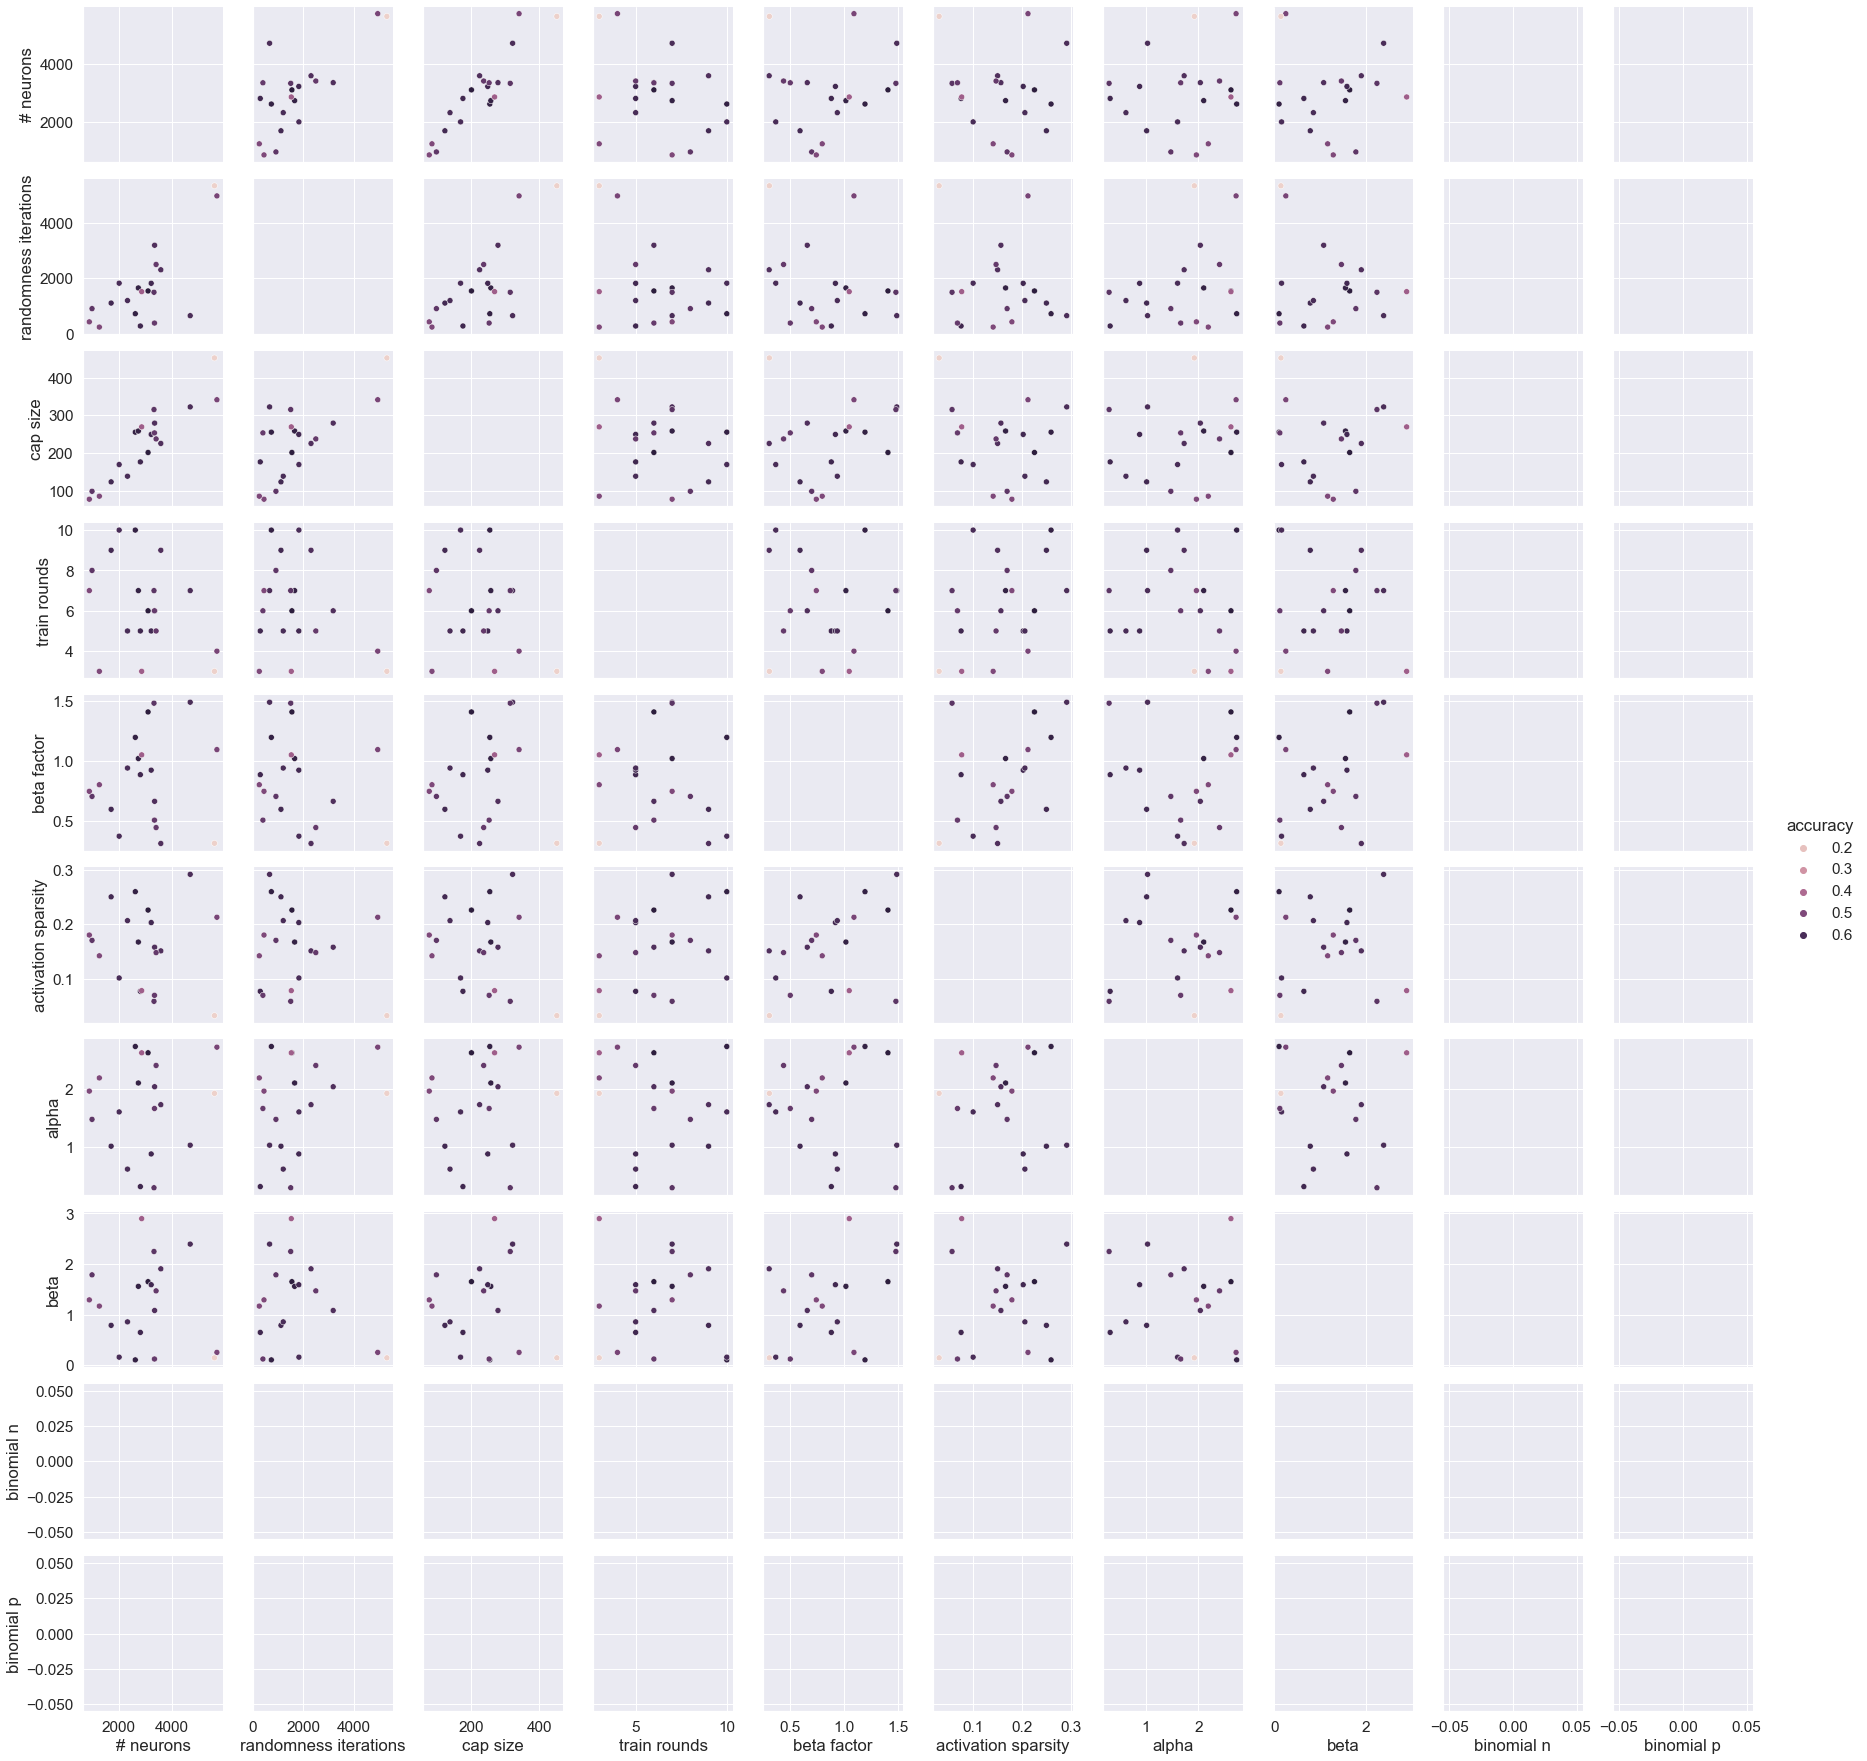

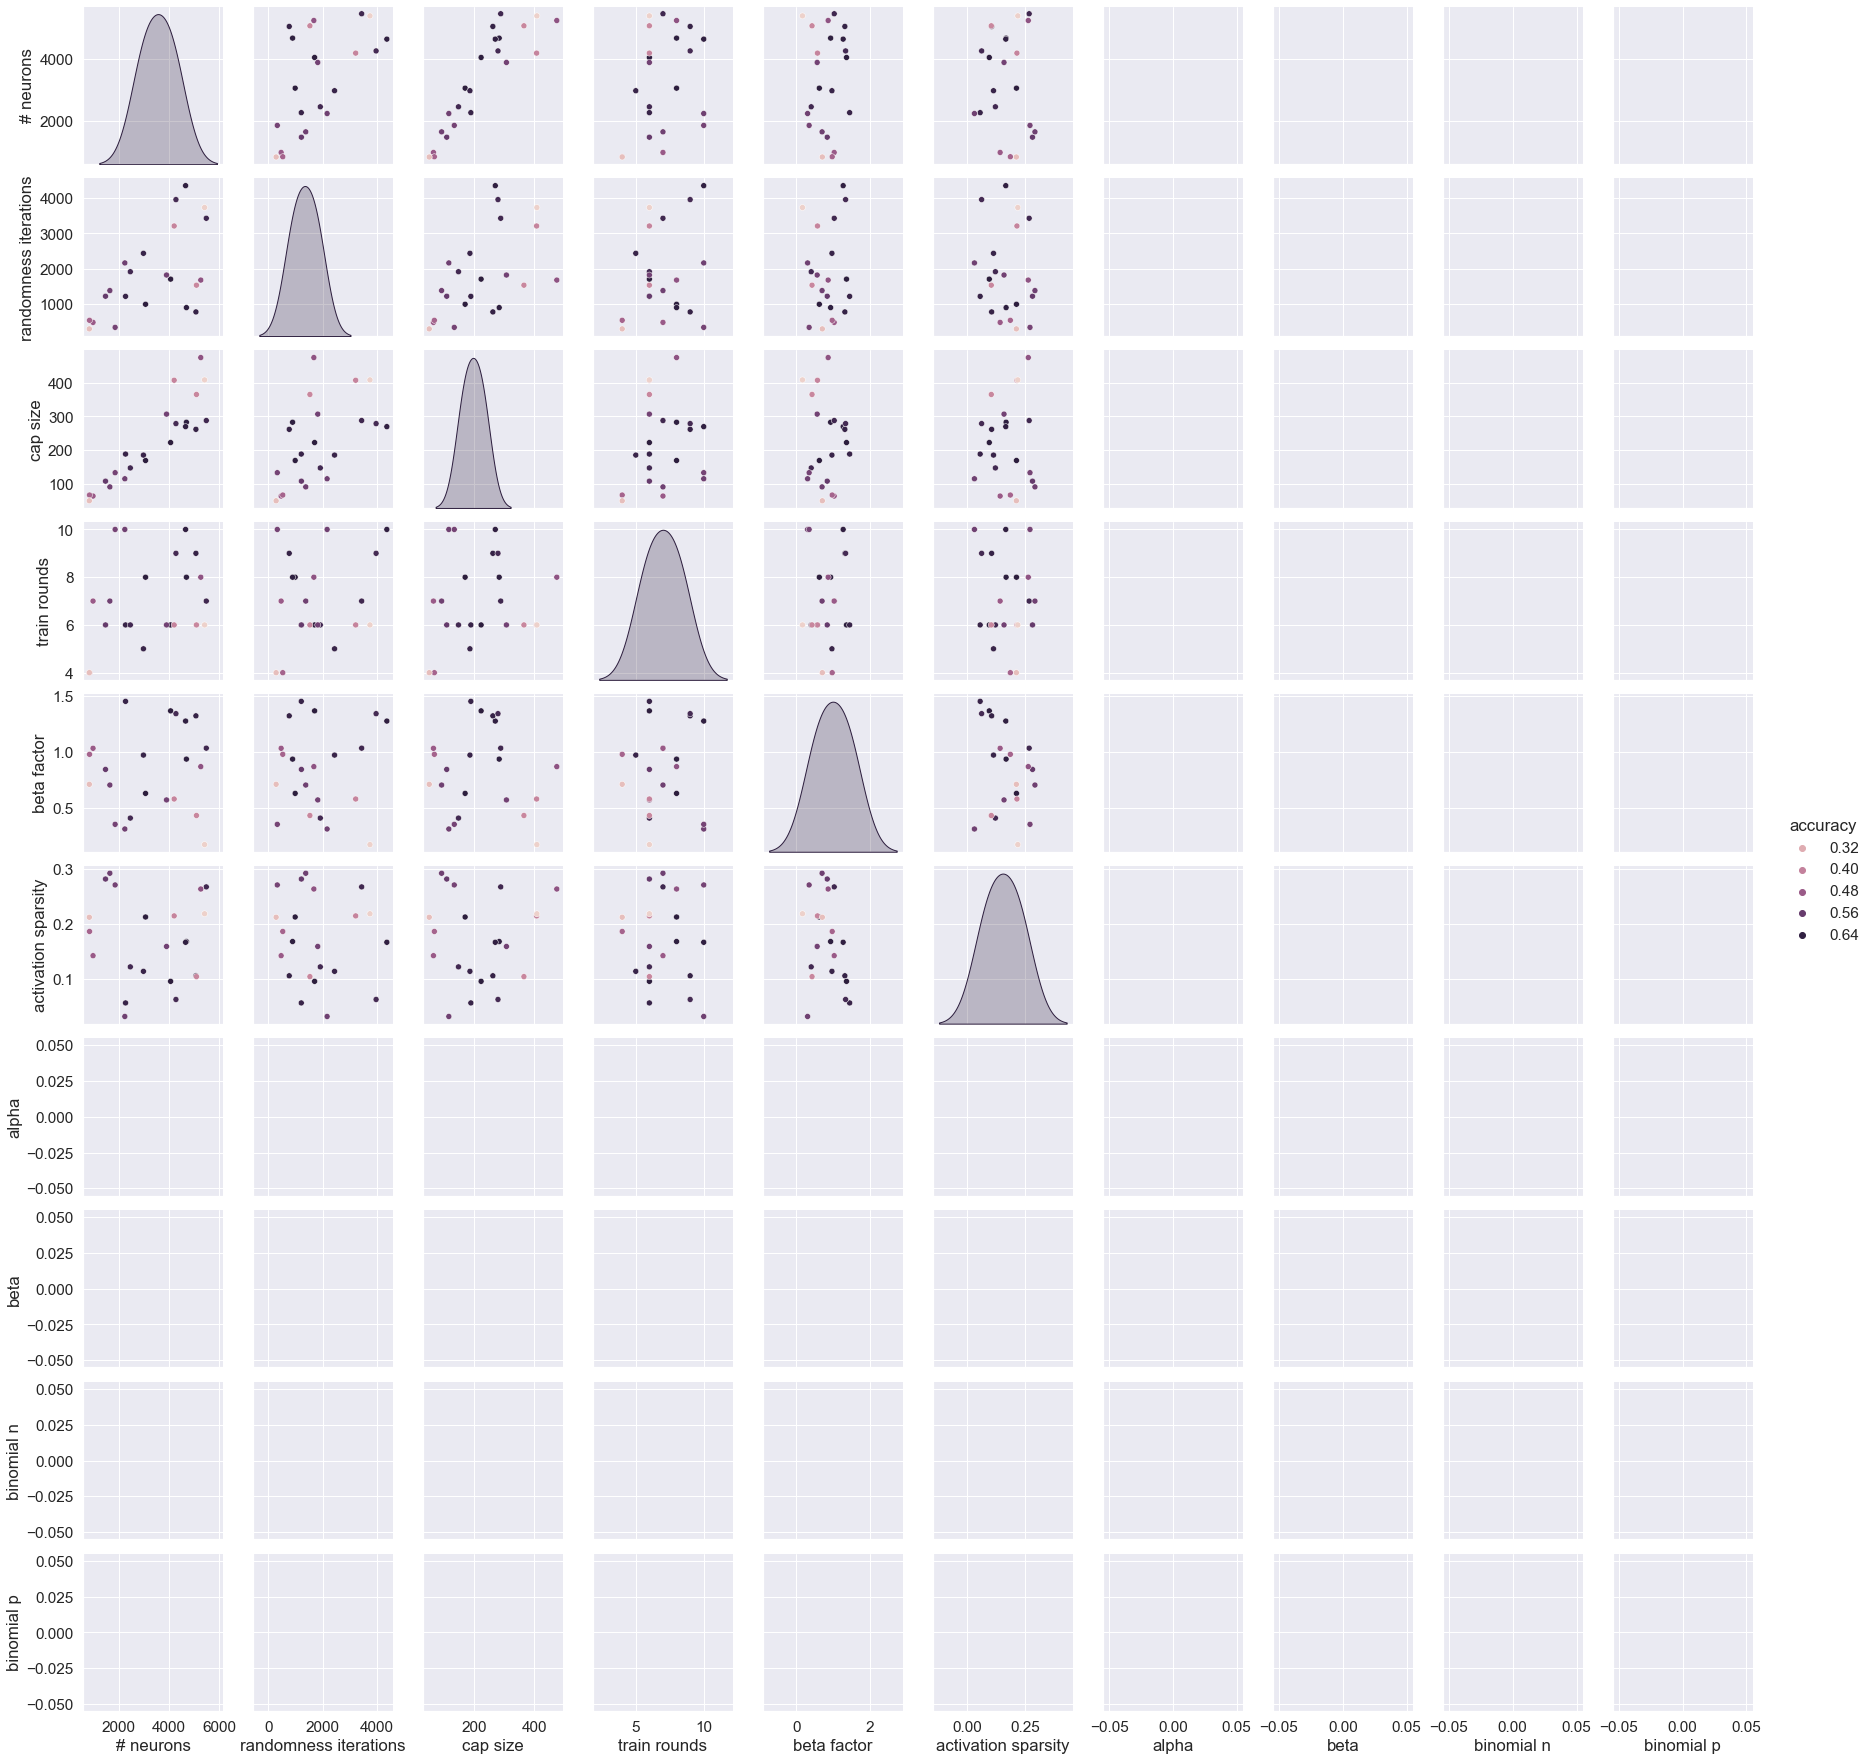

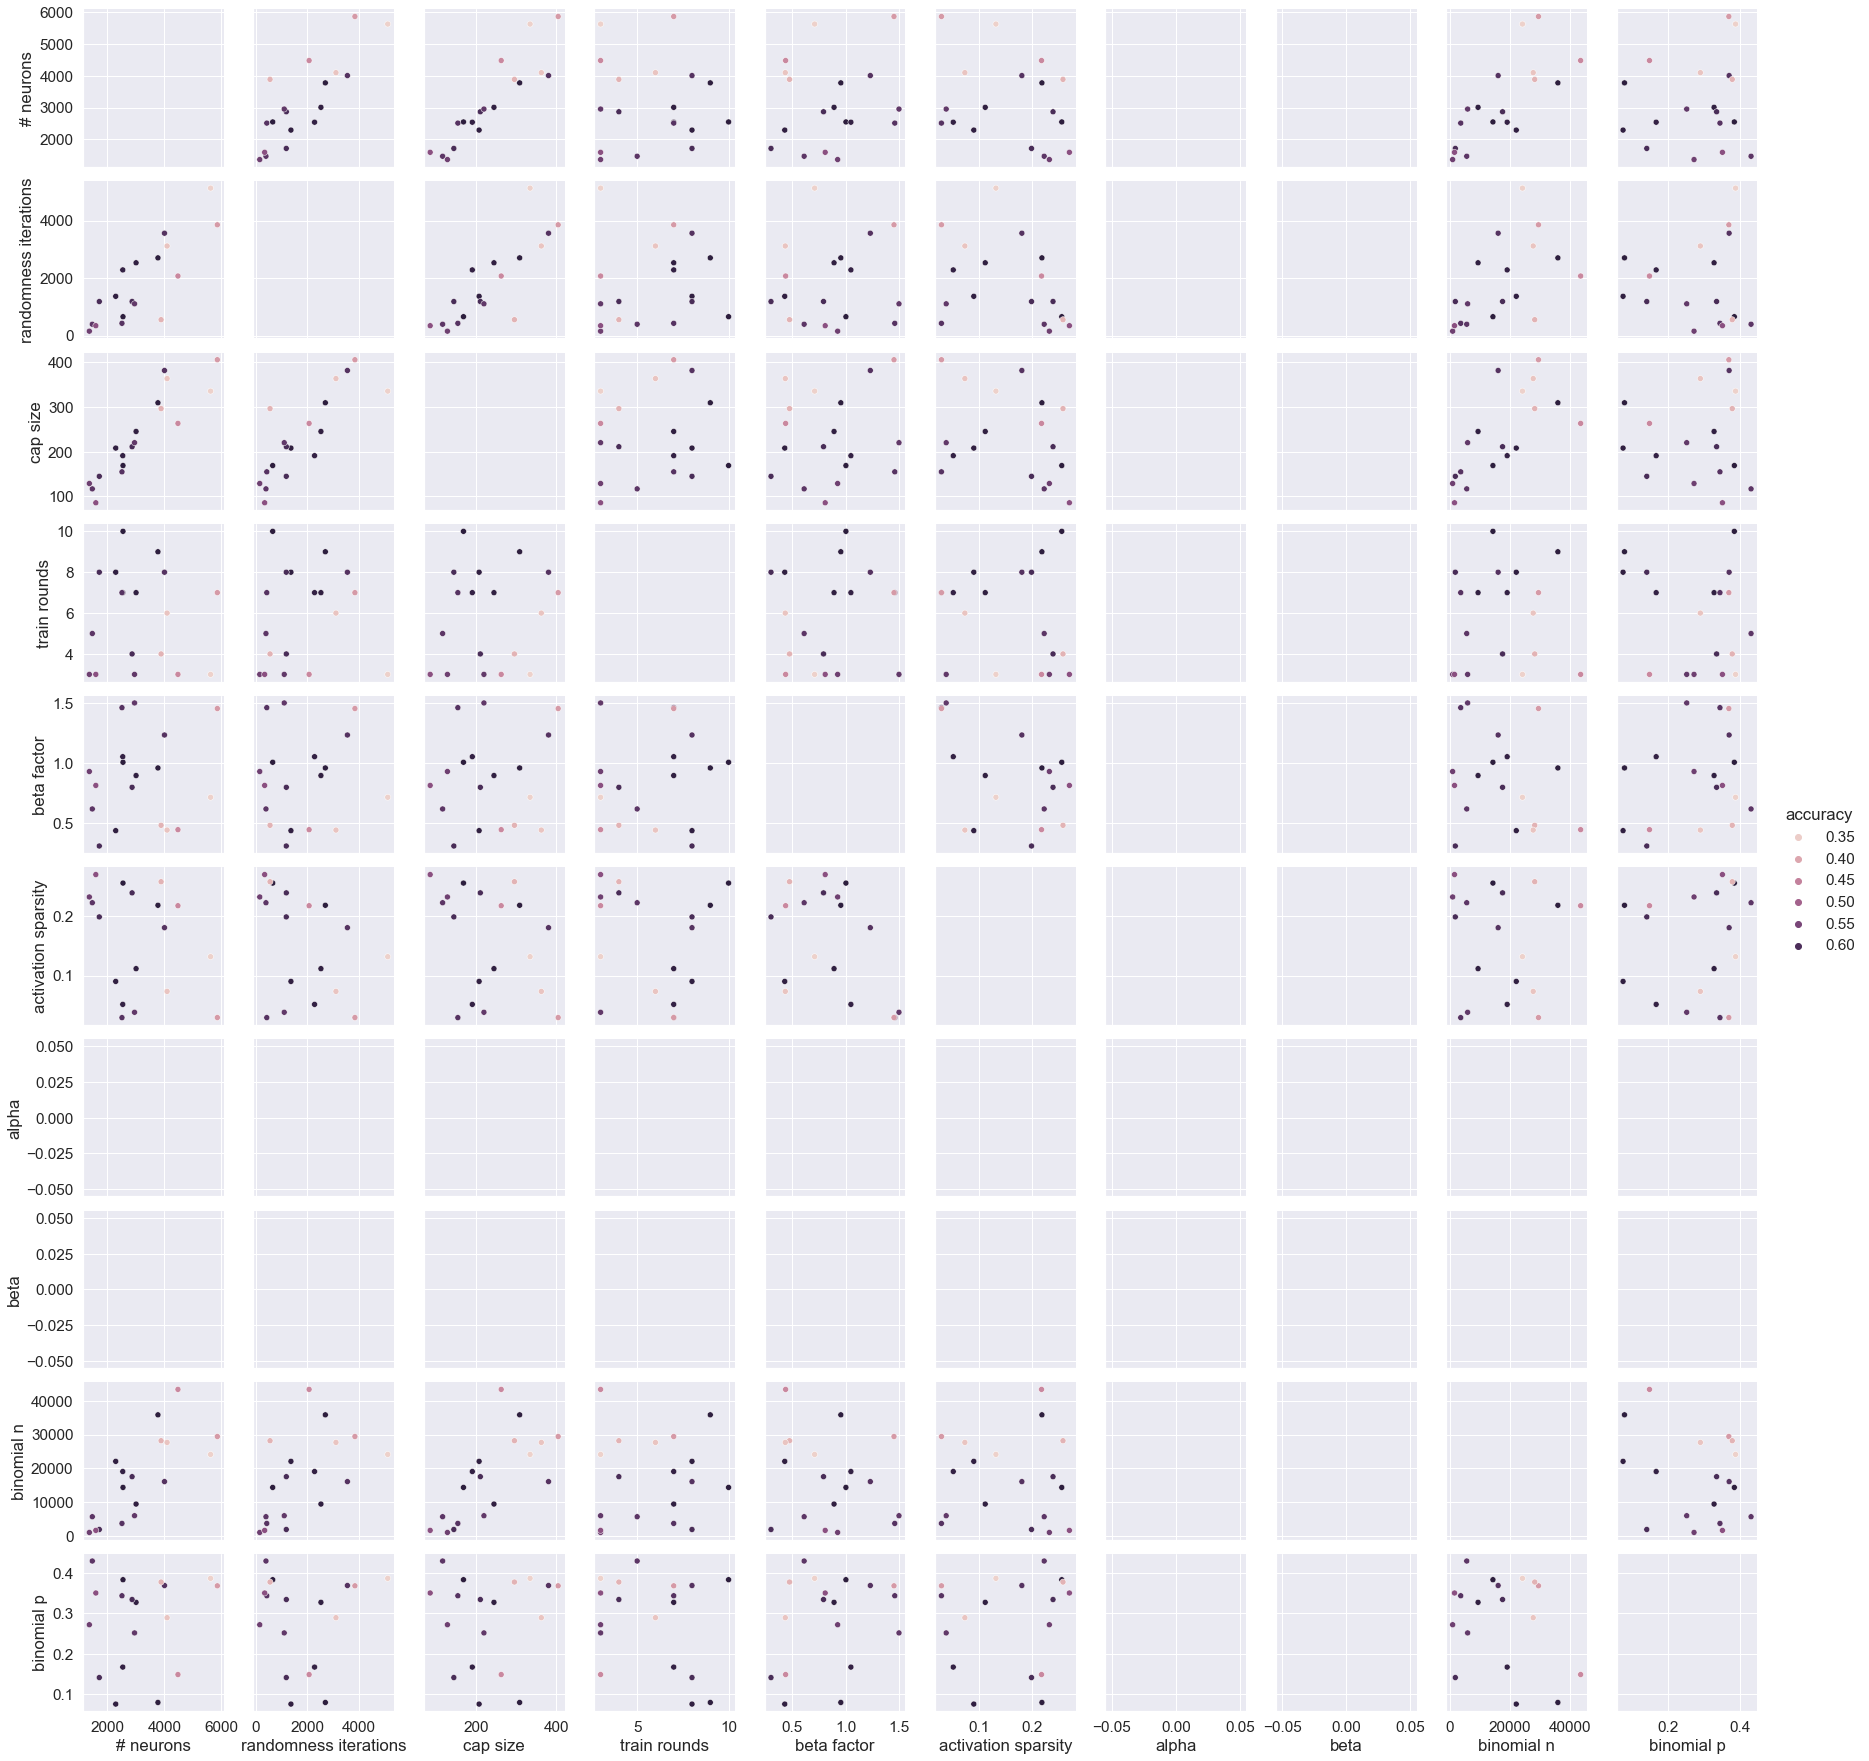

In [28]:
for distribution_type in experiment_df['distribution type'].unique():
    current_df = experiment_df[experiment_df['distribution type'] == distribution_type]
    sns.set_theme(style="ticks")
    sns.set(font_scale = 1.4)
    sns.pairplot(current_df, hue="accuracy", diag_kind="kde")
    plt.savefig(f'random_graph_pairplot_{distribution_type}_2.png', dpi=600)
    # plt.suptitle('Average Accuracy vs. Pairwise Plot of Features', fontsize=30, y=1.03)

### Transformed numerical data

In [95]:
current_df_num

,n_neurons,n_iter,cap_size,n_rounds,beta_factor,a_sparsity,accuracy,n,p
7,-0.426501,-0.853592,-0.564344,1.702107,0.436715,1.192640,0.851410,-0.219532,0.915694
8,0.445186,0.699981,0.788535,1.229300,0.306330,0.711068,0.836276,1.523744,-1.858482
11,-0.607925,-0.315233,-0.187470,0.756492,-1.128059,-0.940970,0.795742,0.406484,-1.894473
12,-0.100504,0.570137,0.170076,0.283685,0.132846,-0.663873,0.790102,-0.618744,0.404045
14,-0.432170,0.381825,-0.351748,0.283685,0.564155,-1.439159,0.765705,0.162359,-1.058707
21,-0.199720,-0.451911,-0.158480,-1.134738,-0.136416,0.980313,0.544459,0.038758,0.467912
22,-1.017547,-0.453429,-0.796266,0.756492,-1.479827,0.458631,0.543543,-1.229380,-1.295406
26,0.608185,1.351480,1.484301,0.756492,1.060594,0.224830,0.427009,-0.079743,0.784355
27,-0.452013,-1.028236,-0.699632,0.283685,1.686356,-1.726331,0.413429,-1.084006,0.552896
30,-1.191884,-1.052534,-1.066841,-0.661931,-0.632107,0.766000,0.347551,-0.922767,1.338086


### Untransformed numerical data

In [94]:
experiment_df

,n_neurons,n_iter,cap_size,n_rounds,beta_factor,a_sparsity,accuracy,type,a,b,n,p
0,3109,1545,201,6,1.405936,0.225641,0.6543,beta,2.623442,1.650631,NaN,NaN
1,3059,992,170,8,0.626742,0.212889,0.6487,uniform,NaN,NaN,NaN,NaN
2,4060,1705,223,6,1.362842,0.096067,0.6487,uniform,NaN,NaN,NaN,NaN
3,4691,897,283,8,0.932592,0.168336,0.6429,uniform,NaN,NaN,NaN,NaN
4,4658,4356,270,10,1.272062,0.166997,0.6407,uniform,NaN,NaN,NaN,NaN
5,2626,727,255,10,1.194366,0.259368,0.6396,beta,2.732283,0.103962,NaN,NaN
6,2742,1653,258,7,1.018542,0.166978,0.6386,beta,2.102302,1.558528,NaN,NaN
7,2546,655,169,10,1.003339,0.255297,0.6368,binomial,NaN,NaN,14305.0,0.384046
8,3776,2701,309,9,0.955775,0.218011,0.6352,binomial,NaN,NaN,35842.0,0.078135
9,5071,774,262,9,1.318492,0.106150,0.6330,uniform,NaN,NaN,NaN,NaN


In [96]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

model_data_list = []

current_df = standardized_experiment_df
current_df_num_x = current_df[num_cols].dropna(axis=1).drop('accuracy', axis=1)

clf = LinearRegression()
clf.fit(current_df_num_x, current_df['accuracy'])

scores = cross_val_score(clf, current_df_num_x, current_df['accuracy'], cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

feature_coefficient_pairs = sorted(list(zip(current_df_num_x.columns, clf.coef_)), reverse=True, key=lambda x: abs(x[1]))

print(f"all types")
print(feature_coefficient_pairs)
print()

model_data = {
    'distribution type': 'all',
    'coefficients': clf.coef_,
    'intercept': clf.intercept_,
    'model': clf,
    'poly_features': None,
    'feature_coefficient_pairs': feature_coefficient_pairs,
    'scores': scores
}

model_data_list.append(model_data)

for distribution_type in list(standardized_experiment_df['type'].unique()):
    current_df = standardized_experiment_df[standardized_experiment_df['type'] == distribution_type]
    current_df_num_x = current_df[num_cols].dropna(axis=1).drop('accuracy', axis=1)

    clf = LinearRegression()

    scores = cross_val_score(clf, current_df_num_x, current_df['accuracy'], cv=10)
    print("%0.2f R-squared with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

    clf.fit(current_df_num_x, current_df['accuracy'])

    feature_coefficient_pairs = sorted(list(zip(current_df_num_x.columns, clf.coef_)), reverse=True, key=lambda x: abs(x[1]))

    print(f"{distribution_type}")
    print(feature_coefficient_pairs)
    print()

    model_data = {
        'distribution type': distribution_type,
        'coefficients': clf.coef_,
        'intercept': clf.intercept_,
        'model': clf,
        'poly_features': None,
        'feature_coefficient_pairs': feature_coefficient_pairs,
        'scores': scores
    }

    model_data_list.append(model_data)

with open('linear_model_data_list.pickle', 'wb') as fp:
    pickle.dump(model_data_list, fp)

-204.46 accuracy with a standard deviation of 226.64
all types
[('cap_size', -0.4661587199851104), ('n_rounds', 0.4523761623889314), ('beta_factor', 0.39700567148439914), ('n_neurons', 0.22224831080665497), ('n_iter', -0.13612879501420783), ('a_sparsity', 0.05911660522659623)]

-29413.59 R-squared with a standard deviation of 74563.23
beta
[('cap_size', -0.9734439976312597), ('n_neurons', 0.7553099943640156), ('n_rounds', 0.4943059091743306), ('beta_factor', 0.3762462244521954), ('n_iter', -0.20907887176091522), ('a_sparsity', 0.044964145823473585), ('b', 0.043687867643276986), ('a', 0.011841059664837048)]

-516.54 R-squared with a standard deviation of 522.04
uniform
[('cap_size', -0.6051471593534343), ('n_neurons', 0.5361787623233731), ('beta_factor', 0.4517223361225265), ('n_rounds', 0.4310924269707325), ('n_iter', -0.06170891659797756), ('a_sparsity', -0.04907766291302157)]

nan R-squared with a standard deviation of nan
binomial
[('n_neurons', -0.9845587037278606), ('beta_factor',

/Users/romanwang/opt/anaconda3/envs/brain-assembly/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/romanwang/opt/anaconda3/envs/brain-assembly/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [97]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model_data_list = []

current_df = standardized_experiment_df
current_df_num_x = current_df[num_cols].dropna(axis=1).drop('accuracy', axis=1)

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
poly_transformed_data = poly.fit_transform(current_df_num_x)
poly_feature_names = poly.get_feature_names_out()

clf = LinearRegression()

scores = cross_val_score(clf, current_df_num_x, current_df['accuracy'], cv=10)
print("%0.2f R-squared with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf.fit(poly_transformed_data, current_df['accuracy'])

feature_coefficient_pairs = sorted(list(zip(poly_feature_names, clf.coef_)), reverse=True, key=lambda x: abs(x[1]))

print(f"all types")
print(feature_coefficient_pairs)
print()

model_data = {
    'distribution type': 'all',
    'coefficients': clf.coef_,
    'intercept': clf.intercept_,
    'model': clf,
    'poly_features': poly,
    'feature_coefficient_pairs': feature_coefficient_pairs
}

model_data_list.append(model_data)

for distribution_type in list(standardized_experiment_df['type'].unique()):
    current_df = standardized_experiment_df[standardized_experiment_df['type'] == distribution_type]
    current_df_num_x = current_df[num_cols].dropna(axis=1).drop('accuracy', axis=1)

    poly = PolynomialFeatures(interaction_only=True,include_bias = False)
    poly_transformed_data = poly.fit_transform(current_df_num_x)
    poly_feature_names = poly.get_feature_names_out()

    clf = LinearRegression()
    scores = cross_val_score(clf, current_df_num_x, current_df['accuracy'], cv=10)
    print("%0.2f R-squared with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
    clf.fit(poly_transformed_data, current_df['accuracy'])

    feature_coefficient_pairs = sorted(list(zip(poly_feature_names, clf.coef_)), reverse=True, key=lambda x: abs(x[1]))

    print(f"{distribution_type}")
    print(feature_coefficient_pairs)
    print()

    model_data = {
        'distribution type': distribution_type,
        'coefficients': clf.coef_,
        'intercept': clf.intercept_,
        'model': clf,
        'poly_features': poly,
        'feature_coefficient_pairs': feature_coefficient_pairs
    }

    model_data_list.append(model_data)

with open('polynomial_model_data_list.pickle', 'wb') as fp:
    pickle.dump(model_data_list, fp)

-204.46 R-squared with a standard deviation of 226.64
all types
[('n_neurons cap_size', -0.486983411657753), ('cap_size', -0.36355860674663537), ('cap_size n_rounds', 0.30850766457185685), ('beta_factor', 0.28255169331496954), ('n_rounds', 0.26379150146832114), ('n_iter n_rounds', -0.18021447340757907), ('n_iter', 0.1549043349174104), ('n_neurons beta_factor', 0.14453213874738988), ('n_iter beta_factor', 0.1434193168043277), ('n_neurons n_iter', -0.13489144920883483), ('cap_size beta_factor', -0.09441997639721339), ('n_rounds beta_factor', -0.09242258682714898), ('cap_size a_sparsity', 0.0798124621125566), ('a_sparsity', 0.07906526030323606), ('beta_factor a_sparsity', 0.07587175859256395), ('n_iter a_sparsity', 0.04738086777365747), ('n_neurons', 0.04443197058773439), ('n_neurons a_sparsity', -0.03178994504100459), ('n_neurons n_rounds', -0.028017665150522213), ('n_rounds a_sparsity', 0.012009168295167762), ('n_iter cap_size', -0.0026247930516902136)]

-29413.59 R-squared with a stand

/Users/romanwang/opt/anaconda3/envs/brain-assembly/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/romanwang/opt/anaconda3/envs/brain-assembly/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
